# TẠO CÁC TẬP DỮ LIỆU TRAIN, TEST (SPLITS)

1. Yêu cầu chung: Tạo ra các splits, mỗi split tương ứng với một tập dữ liệu train - test
  + Bài học lý thuyết (để trả lời cho các câu hỏi như vì sao phải cần việc này, thực hiện việc này như thế nào):
    - https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation
    - https://machinelearningmastery.com/training-validation-test-split-and-cross-validation-done-right/
    - https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

  <IMG SRC = 'https://raw.githubusercontent.com/satishgunjal/images/master/KFold_Cross_Validation.png'>
2. Yêu cầu cụ thể:

- Input:

    + Thư mục cha chứa các thư mục con - mỗi thư mục con tương ứng với tên của từng hiệu xe (Honda, Suzuki, VinFast, Yamaha, Others). Ví dụ: https://drive.google.com/drive/u/1/folders/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra

    + Các ảnh được đặt tên theo quy ước: các tập tin ảnh theo quy ước

    + Số splits NumSplits - mặc định NumSplits=5 (tương đương 5-fold CV)

- Output:

    + File CarDataset.csv - Tập tin chứa tất cả ảnh của dataset

      - Chương trình sẽ scan qua cây thư mục để tìm tất cả các ảnh (chỉ chọn các ảnh có định dạng + phần mở rộng là .jpg)

      - Mỗi dòng sẽ có các thông tin cách nhau bằng dấu phẩy, theo quy ước: ImageFullPath, CategoryID

            - ImageFullPath ở dạng <Thư mục Hiệu xe>/<Tên ảnh>. Ví dụ: Honda/2024123.Honda.1.jpg.
            - CategoryID là số nguyên thuộc [0..5] theo quy ước
              - 0: Others
              - 1: Honda
              - 2: Suzuki
              - 3: Yamaha
              - 4: VinFast     
    + File CarDataset-Splits-[1..5]-[Train/Test].csv - Phân chia thành các splits, mỗi split gồm các ảnh được chia thành thành 2 tập Train - Test

      + Chương trình sẽ đọc dữ liệu từ file CarDataset.csv, sau đó với mỗi hiệu xe, chia ngẫu nhiên thành 5 tập dữ liệu. Lưu ý là phải chia theo hiệu xe, để đảm bảo dữ liệu Train/Test có dữ liệu của các hiệu xe.

      + Từ 5 tập dữ liệu chia ngẫu nhiên theo các hiệu xe Xij (i là thứ tự tập dữ liệu, j là CategoryID), gom lại thành 5 tập dữ liệu lớn hơn Xi, sao cho mỗi tập dữ liệu này chứa đủ dữ liệu của tất cả các hiệu xe. Tức là Xi = Union(Xij)   

      + Từ 5 tập dữ liệu Xi này (tương ứng với FOLDi ở trong hình vẽ trên), tạo ra 5 splits Split-i

      + Với mỗi bộ dữ liệu Split-i, ghi xuống thành 2 tập tin tương ứng với Train, Test. Ví dụ Split-1 thì ghi thành tập tin  CarDataset-Splits-1-Train.csv và CarDataset-Splits-1-Test.csv. Tập Train gồm 4 bộ, Test gồm bộ còn lại. Ví dụ,

          + Split-1: tập Train sẽ gồm X2, X3, X4, X5, tập Test là X1
          + Split-5: tập Train sẽ gồm X1, X2, X3, X4, tập Test là X5
      + Mỗi dòng sẽ có các thông tin cách nhau bằng dấu phẩy, theo quy ước: ImageFullPath, CategoryID
- Lưu ý:
  - Nên viết thêm các cell
    - Hiển thị danh sách các tên tập tin ảnh trong từng Split-Train/Test,
    - Thống kê các ảnh cho từng CategoryID trong mỗi Split-Train/Test
  - Cần có chú thích
3. Nộp bài: SV share notebook. Các bài nộp sớm sẽ được full điểm. Deadline: TBA
4. Bài làm đạt yêu cầu sẽ được paste vào notebook với ghi nhận đóng góp từ tác giả.

## Thông tin của tác giả, ngày cập nhật
Thành viên nhóm:


*   Tăng Gia Hân - 22520394
*   Tăng Mỹ Hân - 22520395


Ngày cập nhật: 15/12/2024

# Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/CS114

/content/drive/MyDrive/Colab Notebooks/CS114


In [ ]:
import os
import csv

# Loại xe và ID tương ứng
categories = {
    'Others': 0,
    'Honda': 1,
    'Hyundai': 2,
    'KIA': 3,
    'Mazda': 4,
    'Mitsubishi': 5,
    'Suzuki': 6,
    'Toyota': 7,
    'VinFast': 8
}

# Scan the directory and collect image paths
def scan_images(input_dir):
    data = []
    valid_extensions = {'.jpg', '.jpeg', '.png'}

    # Duyệt cây thư mục
    for brand in os.listdir(input_dir):
        brand_path = os.path.join(input_dir, brand)

        if os.path.isdir(brand_path) and brand in categories:
            for filename in os.listdir(brand_path):
                if os.path.splitext(filename)[1].lower() in valid_extensions:
                    # Kiểm tra filename có chứa tên hiệu xe không
                    if brand in filename:
                        # Full path of the image
                        image_full_path = os.path.join(brand, filename)
                        # Lấy category ID cho từng hiệu xe
                        category_id = categories[brand]
                        # Thêm vào list data
                        data.append([image_full_path, category_id])

    return data

# Ghi data vào file CSV
def write_to_csv(data, output_file):
    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["ImageFullPath", "CategoryID"])  # Header
        writer.writerows(data)

# Main
input_directory = "Public"
output_file = "CarDataset.csv"

# Scan images and create the dataset
image_data = scan_images(input_directory)
write_to_csv(image_data, output_file)

print(f"Dataset has been saved to {output_file}.")


Dataset has been saved to CarDataset.csv.


In [ ]:
import os
import csv
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# Đọc dữ liệu từ CarDataset.csv
def read_dataset(file_path):
    data = pd.read_csv(file_path)
    return data  # DataFrame với cột "ImageFullPath" và "CategoryID"

# Ghi dữ liệu xuống file CSV
def write_split_to_csv(data, split_type, fold_index, output_dir):
    output_file = os.path.join(output_dir, f"CarDataset-Splits-{fold_index}-{split_type}.csv")
    data.to_csv(output_file, index=False)
    print(f"Saved: {output_file}")


input_file = "CarDataset.csv"
output_directory = "splits_output"
num_splits = 5

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Đọc dữ liệu
dataset = read_dataset(input_file)

# Tạo danh sách đường dẫn ảnh và nhãn
X = dataset["ImageFullPath"].values  # Feature (đường dẫn ảnh)
y = dataset["CategoryID"].values  # Labels (CategoryID)

# Chia dữ liệu bằng StratifiedKFold
skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Tạo các Split Train-Test
for fold_index, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
    # Lấy dữ liệu Train/Test theo chỉ số
    train_data = dataset.iloc[train_idx]
    test_data = dataset.iloc[test_idx]

    # Ghi dữ liệu xuống file CSV
    write_split_to_csv(train_data, "Train", fold_index, output_directory)
    write_split_to_csv(test_data, "Test", fold_index, output_directory)

    # Thống kê dữ liệu
    print(f"Fold-{fold_index} Train statistics:")
    print(train_data["CategoryID"].value_counts())
    print(f"Fold-{fold_index} Test statistics:")
    print(test_data["CategoryID"].value_counts())


Saved: splits_output/CarDataset-Splits-1-Train.csv
Saved: splits_output/CarDataset-Splits-1-Test.csv
Fold-1 Train statistics:
CategoryID
6    5334
7    4734
0    3164
3    2695
4    2660
2    2609
1    2423
5    2410
8    1834
Name: count, dtype: int64
Fold-1 Test statistics:
CategoryID
6    1333
7    1184
0     791
3     674
4     666
2     652
1     605
5     602
8     459
Name: count, dtype: int64
Saved: splits_output/CarDataset-Splits-2-Train.csv
Saved: splits_output/CarDataset-Splits-2-Test.csv
Fold-2 Train statistics:
CategoryID
6    5334
7    4734
0    3164
3    2695
4    2661
2    2609
1    2422
5    2409
8    1835
Name: count, dtype: int64
Fold-2 Test statistics:
CategoryID
6    1333
7    1184
0     791
3     674
4     665
2     652
1     606
5     603
8     458
Name: count, dtype: int64
Saved: splits_output/CarDataset-Splits-3-Train.csv
Saved: splits_output/CarDataset-Splits-3-Test.csv
Fold-3 Train statistics:
CategoryID
6    5334
7    4734
0    3164
3    2695
4    2661
2    

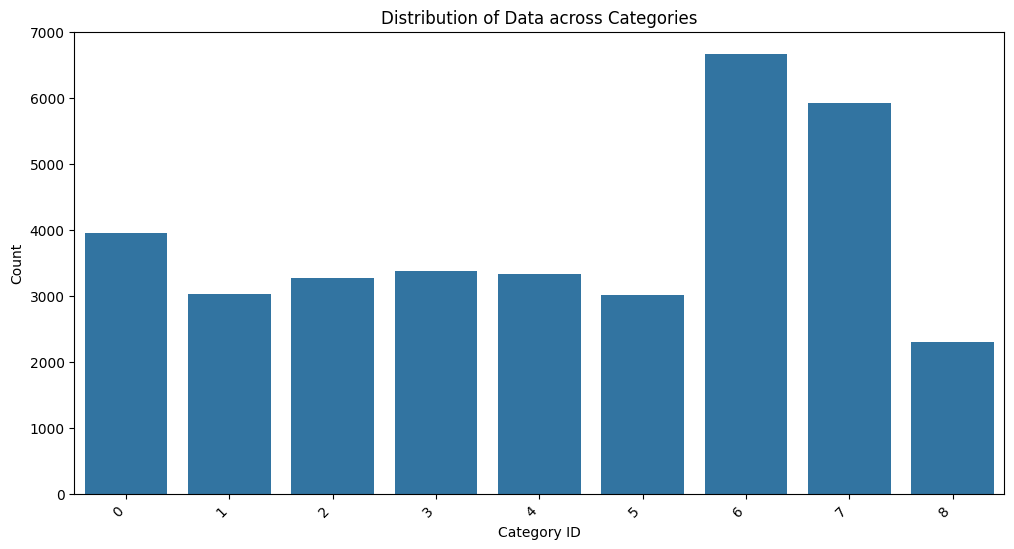

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("CarDataset.csv")

plt.figure(figsize=(12, 6))
sns.countplot(x='CategoryID', data=data)
plt.title('Distribution of Data across Categories')
plt.xlabel('Category ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

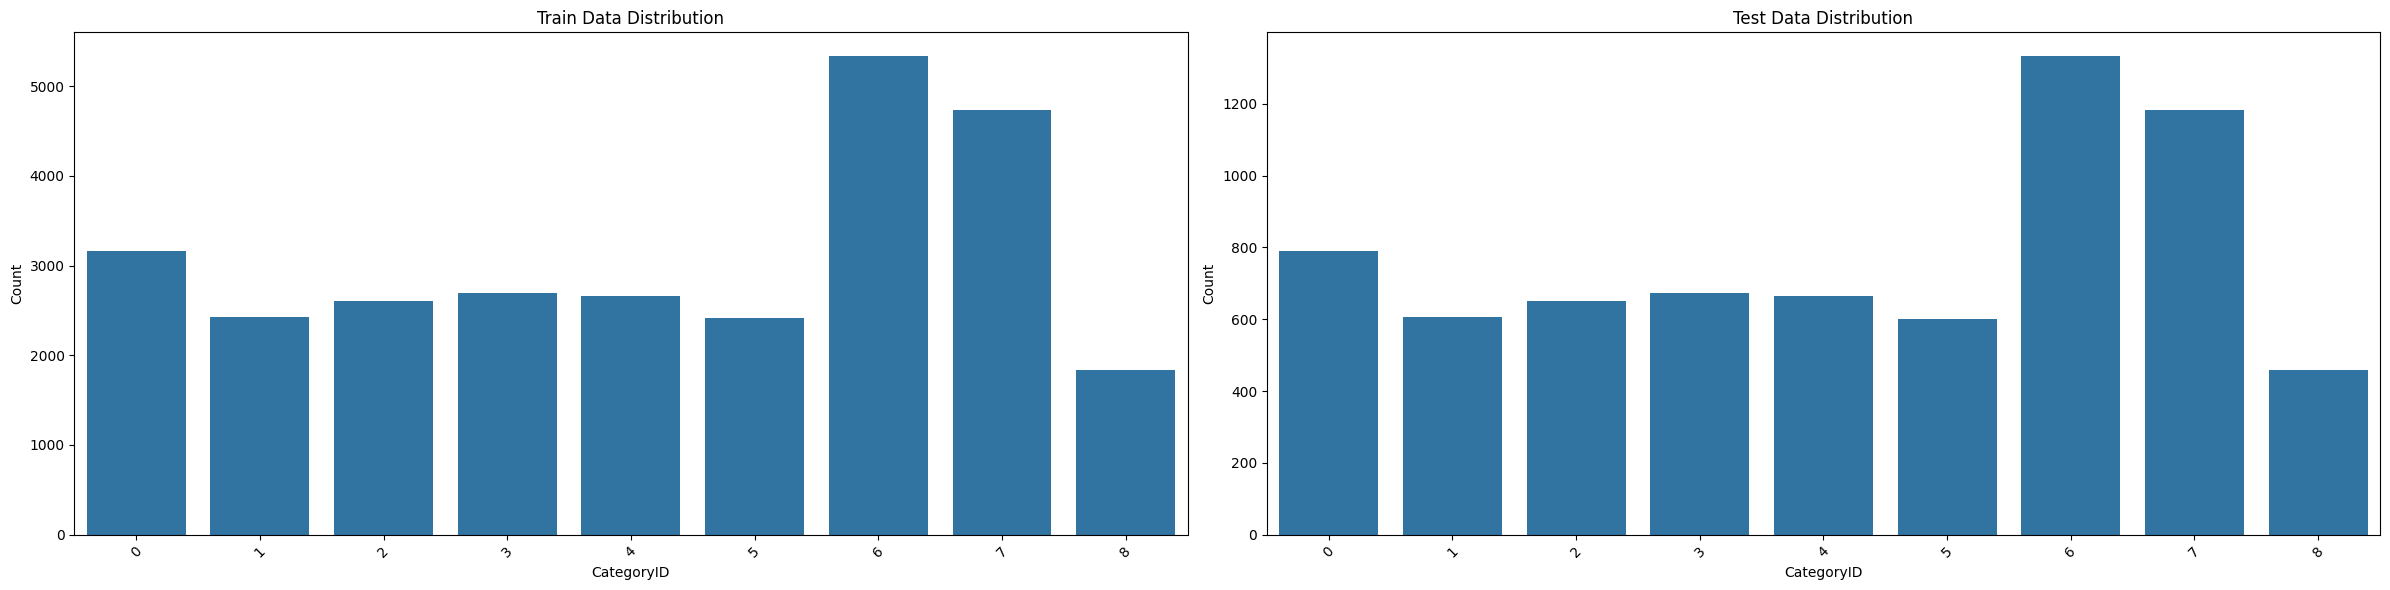

In [ ]:
KQ_split1_train = pd.read_csv("./splits_output/CarDataset-Splits-1-Train.csv", encoding='utf-8')
KQ_split1_test = pd.read_csv("./splits_output/CarDataset-Splits-1-Test.csv", encoding='utf-8')

# Tạo subplots với 1 hàng và 2 cột
fig, axes = plt.subplots(1, 2, figsize=(24, 6))  # Điều chỉnh figsize nếu cần

# Vẽ biểu đồ phân phối cho tập huấn luyện trên subplot đầu tiên
sns.countplot(x='CategoryID', data=KQ_split1_train, ax=axes[0])
axes[0].set_title("Train Data Distribution")
axes[0].set_xlabel("CategoryID")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ phân phối cho tập kiểm tra trên subplot thứ hai
sns.countplot(x='CategoryID', data=KQ_split1_test, ax=axes[1])
axes[1].set_title("Test Data Distribution")
axes[1].set_xlabel("CategoryID")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh layout để tránh chồng chéo
plt.show()